<a href="https://colab.research.google.com/github/Rahulxz/Placement-Predictor-Regression-Model/blob/main/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Project on Logistic Regression


In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


#Steps
1.Data Preprocessing, Feature Selection,EDA

2.Extract Input and Output cols

3.Train_Test_Split()

4.Train Model

5.Evaluate model/Model Selection

6.Deploy Model




In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df=df[['cgpa','iq','placement']]

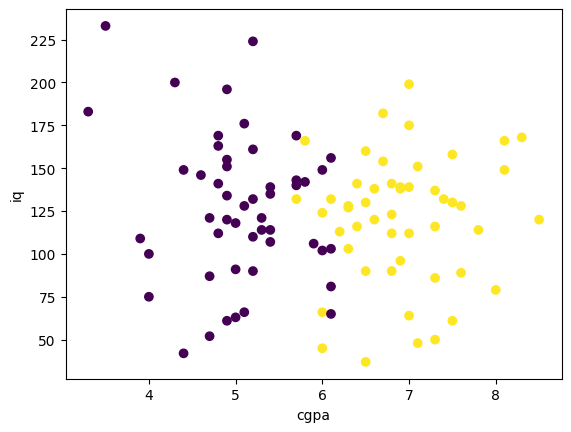

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f36051cc170>,
 'caps': [<matplotlib.lines.Line2D at 0x7f35d7d70fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f35d7d70d40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f35d7d72720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f35d7d70f80>],
 'means': []}

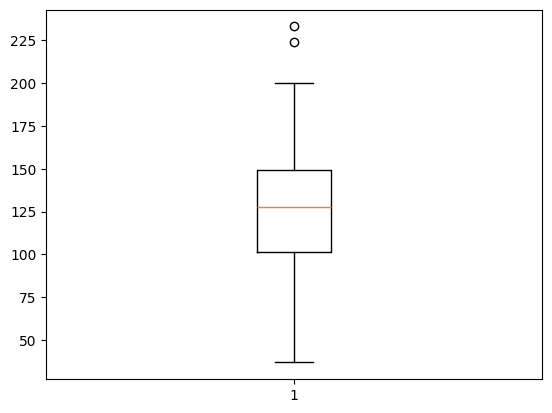

In [16]:
plt.boxplot(df['iq'])

In [20]:
Q1 = df['iq'].quantile(0.25)
Q3 = df['iq'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Upper Limit: {upper_limit}')
print(f'Lower Limit: {lower_limit}')

Q1: 101.5
Q3: 149.0
IQR: 47.5
Upper Limit: 220.25
Lower Limit: 30.25


In [21]:
outliers = df[(df['iq'] > upper_limit) | (df['iq'] < lower_limit)]
print('Outliers in the iq column:')
display(outliers)

Outliers in the iq column:


,cgpa,iq,placement
16,5.2,224.0,0
50,3.5,233.0,0


In [22]:
df_cleaned = df[(df['iq'] <= upper_limit) & (df['iq'] >= lower_limit)]
print('DataFrame after removing outliers:')
display(df_cleaned.head())
print(f'Shape of original DataFrame: {df.shape}')
print(f'Shape of cleaned DataFrame: {df_cleaned.shape}')

DataFrame after removing outliers:


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Shape of original DataFrame: (100, 3)
Shape of cleaned DataFrame: (98, 3)


In [25]:
X=df_cleaned[['cgpa','iq']]
y=df_cleaned[['placement']]

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [66]:
x_train

,cgpa,iq
43,6.8,141.0
11,6.9,138.0
71,6.1,132.0
46,5.3,114.0
9,5.1,66.0
...,...,...
2,5.3,121.0
32,7.0,139.0
65,8.1,166.0
68,4.0,75.0


In [67]:
x_test.shape

(10, 2)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [70]:
x_test

array([[-0.43686581,  0.14300907],
       [ 0.55601103,  0.65046062],
       [ 2.14461397,  1.43470393],
       [-1.42974265, -0.36444248],
       [ 0.95316176, -1.05642186],
       [-1.03259191,  0.23527299],
       [-0.43686581, -0.87189403],
       [-0.43686581, -1.79453321],
       [ 0.55601103,  0.14300907],
       [-0.43686581,  1.48083589]])

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [72]:
#training
lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [73]:
y_pred=lr.predict(x_test)


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_pred)

0.8

In [76]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

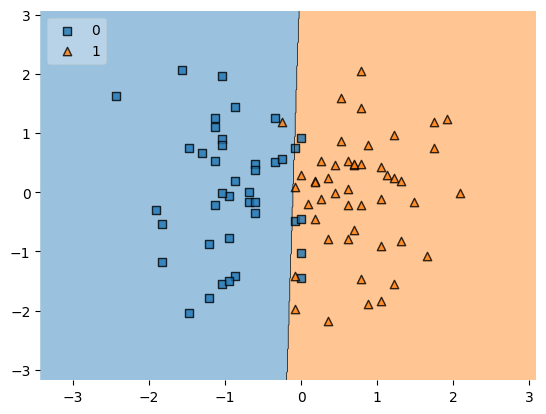

In [78]:
plot_decision_regions(x_train, y_train.values.ravel(), clf=lr, legend=2)

In [79]:
import pickle

In [82]:
pickle.dump(lr,open('model.pkl','wb'))

In [83]:
import os
print(os.path.abspath('model.pkl'))

/content/model.pkl
